In [83]:
import os
os.chdir("C:\\Users\\RAJA  IIT\\Desktop")

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

# Reading in the file

In [85]:
df=pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Checking data types, no Char value except 'label (y)

In [86]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

# No null values

In [87]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

# Equal number of males and females in the dataset

In [88]:
df.label.value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [142]:
df.shape

(3168, 20)

# Pairplot for 5 attributes from Dataframe

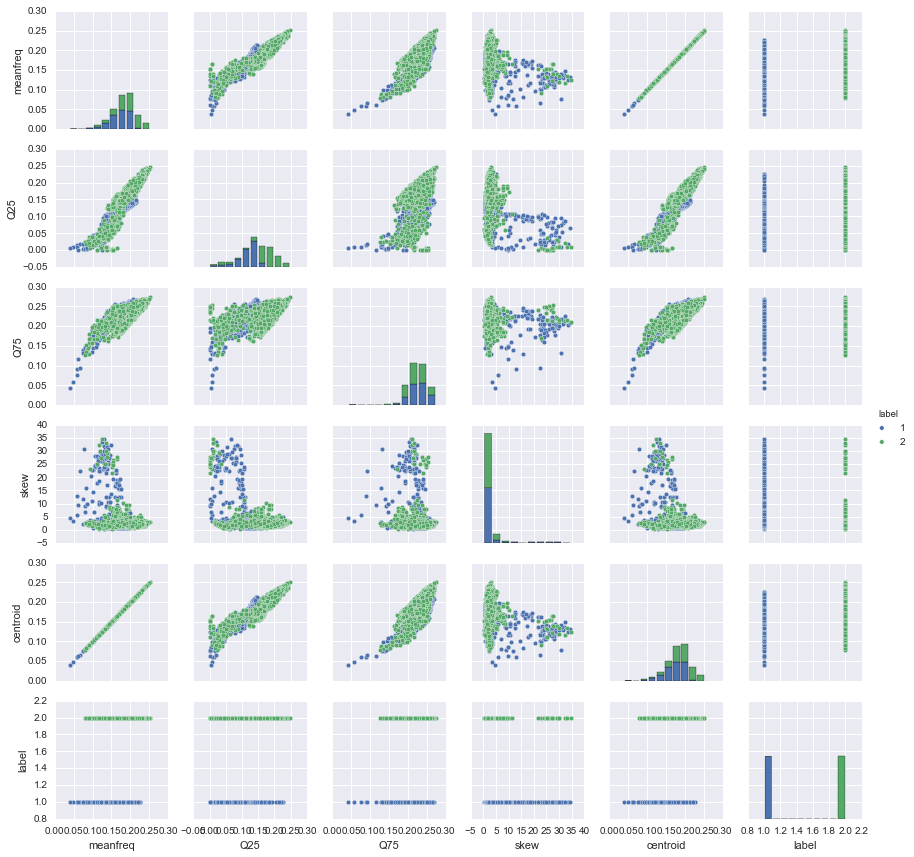

In [144]:
sns.pairplot(df[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], hue='label', size=2)

# Most attributes are highly correlated as they are different measurements of the same entity ie. Frequency Waveform

In [89]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


# Encoding label for target variable

In [90]:
df.label=df.label.map({'male':1,'female':2})

# Separating target and feature columns

In [91]:
y=df.iloc[:,-1]

In [145]:
df=df.drop('label',axis=1)

In [93]:
df.shape

(3168, 20)

# Scaling datasets so as they have mean=0 and variance=1

In [94]:
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

# Splitting datasets into train and test

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Running a Logarithmic regression(default parameters)

In [96]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.970031545741


# Setting Regularization parameter as 2 doesn't change anything

In [97]:
clf = LogisticRegression(C=2)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.970031545741


# Hyper-Parameter Tuning

In [98]:
c_testing =list(range(1,26))
D=[]
for c in c_testing:
    clf = LogisticRegression(C=c)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    D.append(metrics.accuracy_score(y_test,y_pred))

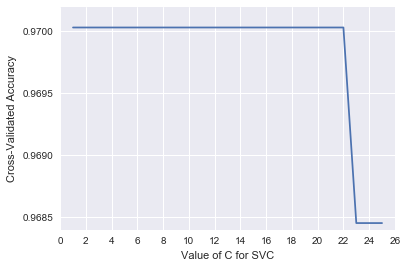

In [99]:
plt.plot(c_testing,D)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

# C = range (1,22) yield same accuracy score of 97%, then a decrease

# Applying SVM(Default Parameters)

In [100]:
svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.976340694006


# Better performance than Logistic regression

# RBF being the default kernel,using linear kernel

In [101]:
svc=SVC(kernel='linear') 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.977917981073


# Linear Kernel has slightly better performance than RBF kernel

# Applying Polynomial Kernel

In [102]:
svc=SVC(kernel='poly') 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.958990536278


# Polynomial kernel performs the worst till now, a reason that comes to mind might be overfitting

In [103]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.96593822147918151, 0.96499084467797158, 0.96435992357296385, 0.9643619138603613, 0.96278361595414386, 0.96246915054533877, 0.96215468513653379, 0.96058036780511102, 0.96058036780511102, 0.95962901042910587, 0.95900007961149591, 0.9577382374014809, 0.9577382374014809, 0.95710930658387061, 0.95679484117506564, 0.95679484117506575, 0.95647838547886332, 0.95616392007005824, 0.95584945466125304, 0.95553299896505062, 0.95553299896505062, 0.95553100867765317, 0.95553100867765317, 0.95553299896505062, 0.95553498925244806]


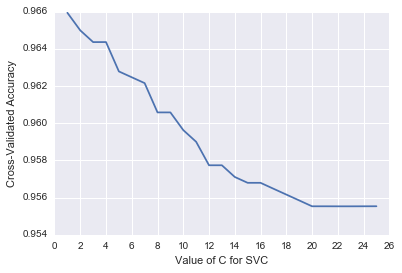

In [104]:
C_values=list(range(1,26))
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

# C=1 gives maximum accuracy(default)

# Doing same for the linear kernel

In [105]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.96941326327521682, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96909879786641184, 0.96941326327521682, 0.96909879786641184, 0.96909879786641184, 0.96878433245760687, 0.96878433245760687, 0.96878433245760687, 0.96846787676140433, 0.9681514210652018, 0.96846787676140433, 0.96846787676140433, 0.9681514210652018, 0.9681514210652018, 0.9681514210652018, 0.9678369556563966, 0.9681514210652018, 0.9681514210652018, 0.96846787676140433, 0.9681514210652018, 0.9681514210652018, 0.96846588647400689]


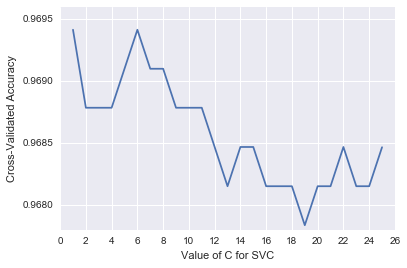

In [106]:
C_values=list(range(1,26))
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

# C =1 and C=6 yield maximum accuracy

# Plot wrt gamma in rbf kernel

In [107]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   


[0.88781147997770871, 0.95524639757981067, 0.9681514210652018, 0.96309609107555116]


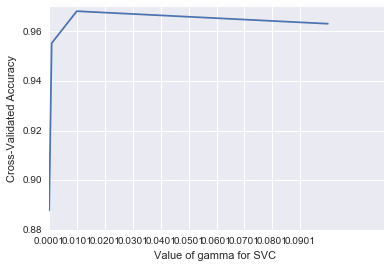

In [108]:
gamma_range=[0.0001,0.001,0.01,0.1]
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,.1,.01))
plt.ylabel('Cross-Validated Accuracy')

# Gamma= 0.01 gives highest CV accuracy

In [109]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.85069262001432988, 0.94576466841811957, 0.83121168696759806, 0.866298463498129, 0.77475718493750489]


# Degree=3 gives highest CV score

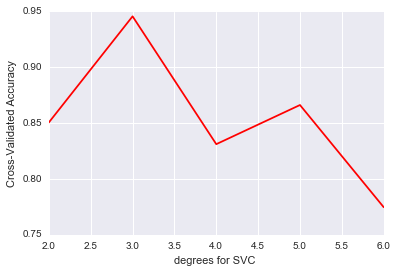

In [110]:
degree=[2,3,4,5,6]
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

# SVM Linear kernel's best prediction acc

In [114]:
svc= SVC(kernel='linear',C=1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.97791798107255523

# SVM RBF kernel's best prediction acc

In [115]:
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.96687697160883279

# Polynomial kernel's best prediction acc

In [ ]:
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

# Result: Linear kernel gives the highest accuracy

# Random Forest without any parameter optimization gives an accuracy paralleled by SVM's rbf kernel classifier

In [116]:
forest = RandomForestClassifier(n_estimators = 100)
forests = forest.fit(X_train,y_train)
y_predict = forests.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.976340694006


In [138]:
forests.feature_importances_

array([ 0.02089443,  0.1130077 ,  0.01116388,  0.11841391,  0.01472924,
        0.17278222,  0.01316724,  0.00796989,  0.043774  ,  0.04773837,
        0.01996035,  0.0158323 ,  0.34531564,  0.00907534,  0.00549954,
        0.00922416,  0.0062344 ,  0.00926213,  0.00961764,  0.00633762])

In [117]:
estimators=list(range(75,125))
acc_score=[]
for n in estimators:
    forest = RandomForestClassifier(n_estimators = n)
    scores = cross_val_score(forest, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.96783496536899916, 0.96720404426399187, 0.96657710373377914, 0.96878234217020931, 0.96720006368919687, 0.96814744049040669, 0.9672020539765942, 0.96783496536899916, 0.9681514210652018, 0.96720603455138909, 0.96783496536899916, 0.96720603455138909, 0.96783496536899916, 0.96814545020300924, 0.96720802483878665, 0.96688559828039167, 0.96688758856778922, 0.96783496536899916, 0.96594419234137396, 0.96846389618660922, 0.96751850967279673, 0.96751850967279673, 0.96720603455138909, 0.96688758856778922, 0.96845991561181433, 0.96625467717538405, 0.96846190589921177, 0.96720006368919687, 0.96846588647400689, 0.96720404426399165, 0.9681514210652018, 0.96752249024759185, 0.96910277844120674, 0.96751850967279673, 0.96846787676140433, 0.96657312315898414, 0.9690968075790144, 0.96784093623119172, 0.96878234217020953, 0.96720404426399154, 0.9672020539765942, 0.96688758856778922, 0.96878035188281186, 0.96941127298781937, 0.96720404426399165, 0.96909879786641184, 0.96688758856778922, 0.967520499960194

# range of estimators between 115 and 120 give the peak, magnifying that

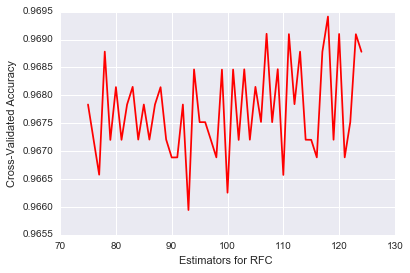

In [118]:
estimators=list(range(75,125))
plt.plot(estimators,acc_score,color='r')
plt.xlabel('Estimators for RFC ')
plt.ylabel('Cross-Validated Accuracy')

In [119]:
estimators=list(range(113,124))
acc_score=[]
for n in estimators:
    forest = RandomForestClassifier(n_estimators = n)
    scores = cross_val_score(forest, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.96909481729161673, 0.96814943077780424, 0.96751452909800162, 0.96783496536899916, 0.96972772868402191, 0.96656914258418902, 0.96752049996019418, 0.96783894594379449, 0.96814943077780424, 0.96751850967279673, 0.96688957885518667]


# peak at n_estimators = 117 

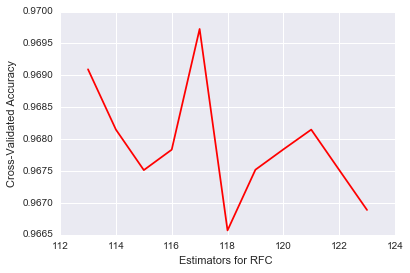

In [120]:
estimators=list(range(113,124))
plt.plot(estimators,acc_score,color='r')
plt.xlabel('Estimators for RFC ')
plt.ylabel('Cross-Validated Accuracy')